In [2]:
import sympy as sym

In [3]:
l = sym.Symbol('lambda')
h = sym.Symbol('h')
b = sym.Symbol('b')
C = sym.Symbol('C')
d = sym.Symbol('delta')

In [41]:
def matrix(l):
    A = sym.Matrix([[2*(1-h)*l-2*b+1, (h-2)*l-1+h, -h*d*l],
                    [(h-2)*l-1+h, 2*l+1-2*C, h*d*l+h*d],
                    [-h*d*l, h*d*l+h*d, 2*b]])
    return A

In [42]:
def Schur(Initial_matrix):
    B2 = Initial_matrix[0:2,2]
    C2 = Initial_matrix[2,2]
    Schur_right_2 = (1/C2)*B2*B2.T
    Schur_left_2 = Initial_matrix[0:2,0:2] - Schur_right_2

    Schur_left_2_final = sym.diag(Schur_left_2, 0)
    Schur_right_2_final = sym.diag(Schur_right_2, 0)
    Schur_right_2_final[0,2] = Initial_matrix[0,2]
    Schur_right_2_final[1,2] = Initial_matrix[1,2]
    Schur_right_2_final[2,0] = Initial_matrix[2,0]
    Schur_right_2_final[2,1] = Initial_matrix[2,1]
    Schur_right_2_final[2,2] = Initial_matrix[2,2]

    return sym.simplify(Schur_left_2_final), sym.simplify(Schur_right_2_final)

## Case 1

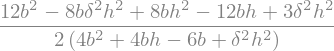

In [ ]:
l = 1
A = matrix(l)
A1, A2 = Schur(A)
value_of_C = sym.solve(sym.det(A1[:2,:2]), C)[0]
value_of_C

In [57]:
first_constraint, second_contraint = sym.solve(A1[0,0], b)

first_order_optimilality_condition = sym.factor(sym.diff(value_of_C, b))
solution_in_b = sym.solve(first_order_optimilality_condition, b)[1]
solution_in_b

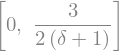

In [62]:
irational_inequation_1 = sym.solve(first_constraint - solution_in_b, h)
irational_inequation_1

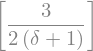

In [63]:
irational_inequation_2 = sym.solve(second_contraint - solution_in_b, h)
irational_inequation_2

## Case 2

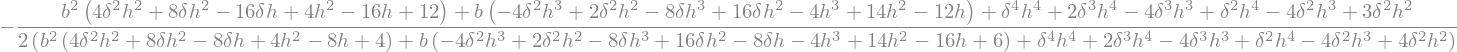

In [76]:
l = (2-h*(1+d))/(h*(1+d)-1)
A = matrix(l)
A1, A2 = Schur(A)
value_of_C = sym.solve(sym.det(A1[:2,:2]), C)[0]
sym.factor(value_of_C, b)

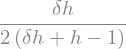

In [82]:
first_constraint, second_contraint = sym.solve(A1[0,0], b)

first_order_optimilality_condition = sym.factor(sym.diff(value_of_C, b))
solution_in_b = sym.solve(first_order_optimilality_condition, b)[0]
solution_in_b

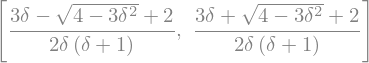

In [83]:
irational_inequation_1 = sym.solve(first_constraint - solution_in_b, h)
irational_inequation_1

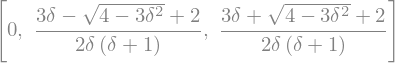

In [84]:
irational_inequation_2 = sym.solve(second_contraint - solution_in_b, h)
irational_inequation_2

## Case 3

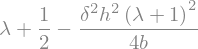

In [90]:
l = sym.Symbol('lambda')
A = matrix(l)
A1, A2 = Schur(A)

value_of_C = sym.solve(A1[1,1], C)[0]
value_of_C